# Numerical Methods for option pricing project

## 1. Review of option pricing lectures

Start out by reproducing the various methods presented in the lectures. In the box below, the imports and settings.

In [125]:
# Enable reload of modules
%load_ext autoreload
%autoreload 2

# Data managements
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# Math and statistic tools
from math import exp
import random 
from scipy import optimize
from scipy.stats import norm

# Visualization tools
import matplotlib.pyplot as plt

preload = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Lecture 5 : Binomial trees

Lecture slide expected outcome: 1.027. Calculated: 1.027245341113353


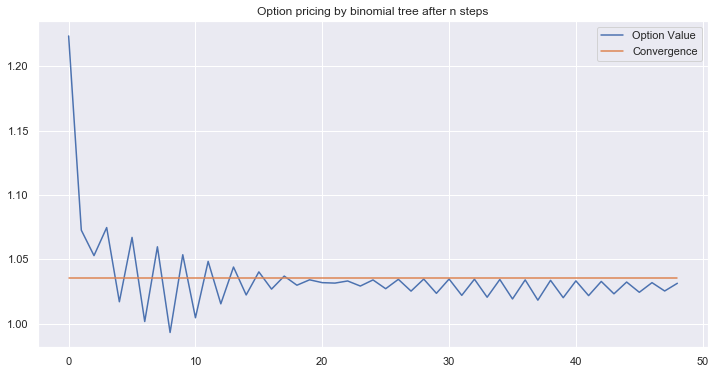

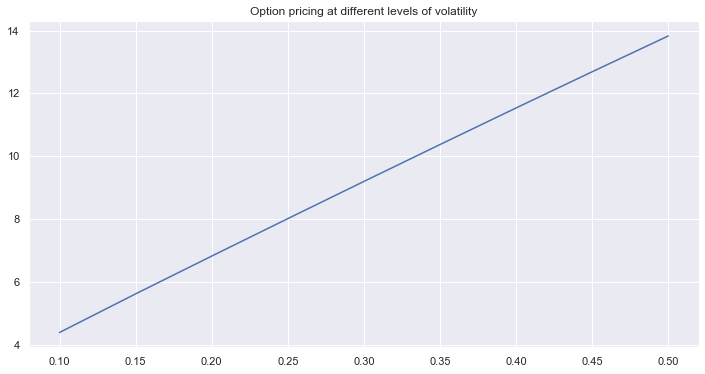

In [126]:
from Lecture5 import Node, Binomial_Tree

#lecture 5 slide 12/36:
tree = Binomial_Tree(S = 20, T = 0.25, o = 0.3, n = 500)  
print("Lecture slide expected outcome: 1.027. Calculated: " + str(tree.present_value(K = 21, r = 0.12)))

# Visualize process of slide 16/36 by changing n
values = []
for n in range(1,50,1):
    tree = Binomial_Tree(S = 20, T = 0.25, o = 0.3, n = n)  
    values.append(tree.present_value(K = 21, r = 0.12))

pd.DataFrame({'Option Value': values, 'Convergence':sum(values)/len(values)}).plot()
plt.title("Option pricing by binomial tree after n steps")
plt.show()
# Visualize changing volatility like in slide 20/36
values = []
vols = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
for vol in vols:
    tree = Binomial_Tree(S = 50, T = 2, o = vol, n = 2)  
    values.append(tree.present_value(K = 52, r = 0.05))
pd.Series(values, index = vols).plot()
plt.title("Option pricing at different levels of volatility")
plt.show()

In [127]:
# American put from slide 24/36
tree = Binomial_Tree(S = 50, T = 5/12, o = 0.4, n = 3)  
print("Lecture slide expected outcome: 4.64. Calculated: " + str(tree.present_value(K = 50, r = 0.1, call = False, european = False)))
# Compare to european:
print("Lecture slide expected outcome: 4.48. Calculated: " + str(tree.present_value(K = 50, r = 0.1, call = False, european = True)))

# Continuous dividend from slide 26/36
growth_params = {'underlying': 'cont_div_stock', 'q': 0.04}
print("Lecture slide expected outcome: 4.48. Calculated: " + str(tree.present_value(K = 50, r = 0.1, call = False, european = False, **growth_params)))

Lecture slide expected outcome: 4.64. Calculated: 4.644075163144819
Lecture slide expected outcome: 4.48. Calculated: 4.482723705669118
Lecture slide expected outcome: 4.48. Calculated: 4.941715964764493


### Lecture 6: Brownian motion and montecarlo simulations

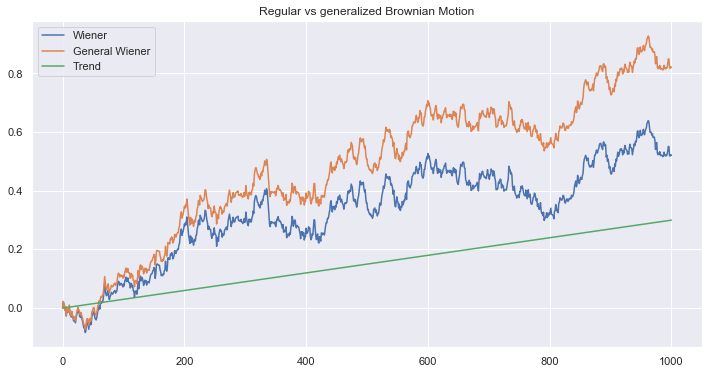

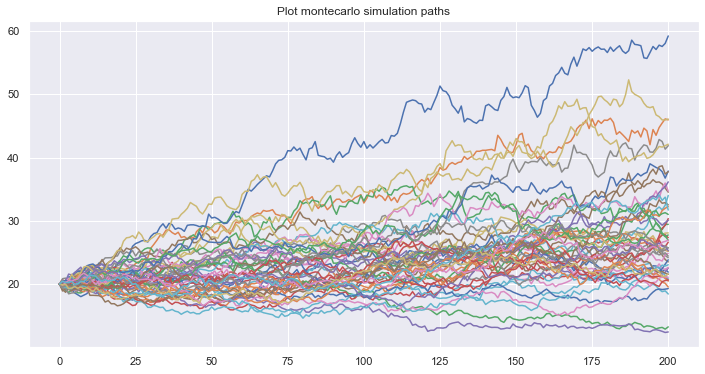

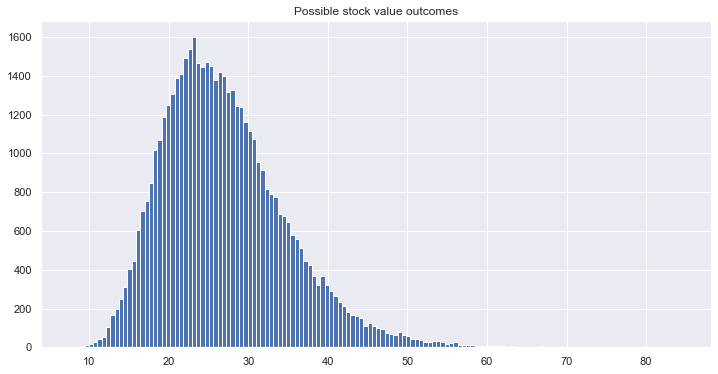

In [128]:
from Lecture6 import brownian_motion, montecarlo

T, N, vol = 2, 1000, 0.3

# Wiener processes like 36/56
brownian_motion(T, N, vol, seed = 1, origin = 0)

# Montecarlo
mu, vol, N, T, r, S, K = 0.15, 0.2, 200, 2, 0.15, 20, 21

# Like results in slide 51/56
mc = montecarlo(mu, vol, T, r)

# First, two hundred step simulation
mc.plot_step_simulation(S, N)

# Now, thousand times more with one time step.
mc.plot_one_step(S)

In [129]:
# so according to montecarlo (slide 48/56)
print("present value of call using MC: " + str(mc.present_value(S, K)))
# Compare to binomial tree. Note that to get same results, need r to equal mu
tree = Binomial_Tree(S, T, vol, 17)  
print("present value of call using BT: " + str(tree.present_value(K, r)))

# Puts?
print("present value of put using BT:  " + str(mc.present_value(S, K, call = False)))

# Compare to binomial tree. Note that to get same results, need r to equal mu
tree = Binomial_Tree(S, T, vol, 50)  
print("present value of put using BT:  " + str(tree.present_value(K, r, call = False)))

present value of call using MC: 4.948397429215785
present value of call using BT: 4.924468255992509
present value of put using BT:  0.5006507763410398
present value of put using BT:  0.5061983603978087


### Lecture 7: Monte Carlo and Black scholes

In [130]:
from Lecture7 import black_scholes,historic_volatility,implied_volatility

#Slide 3/43 Montecarlo
mu, vol, T, r, S, K = 0.13, 0.2, 20/52, 0.05, 49, 50

# According to montecarlo
mc = montecarlo(mu, vol, T, r)
print("Sold options for 3 USD.")
print("According to MC, value was: " + str(mc.present_value(S, K)))
# So receiving 3 per option... bad deal I guess?
print("According to BS, value was: " + str(black_scholes(S, K, vol, r, T)))
# above according to black scholes (because drift factor not present?)

Sold options for 3 USD.
According to MC, value was: 3.2806776678160627
According to BS, value was: 2.4005273232717137


In [131]:
# slide 24/43
S, K, vol, r, T = 30, 29, 0.25, 0.05, 4/12

#call
print("Lecture slide call expected outcome: 2.52. Calculated: " + str(black_scholes(S, K, vol, r, T)))
#put
print("Lecture slide put expected outcome:  1.05. Calculated: " + str(black_scholes(S, K, vol, r, T, call = False)))

# Implied volatility from slide 28/43
price, S, K, r, T = 1.875, 21, 20, 0.1, 0.25
print("Lecture slide IV expected outcome:  0.235. Calculated: " + str(implied_volatility(price, S, K, r, T)))

Lecture slide call expected outcome: 2.52. Calculated: 2.5251469666999995
Lecture slide put expected outcome:  1.05. Calculated: 1.045819127526908
Lecture slide IV expected outcome:  0.235. Calculated: 0.23451290662982638


In [132]:
# Exercise on slide 43/43
S, vol, T, K, r, mu, n = 100, 0.2, 1, 100, 0.07, 0.07, [2,3,500]

print("Lecture slides:")
print("Black and Scholes = $11.5415")
print("Monte Carlo (10,000 simulations) = $11.5407")
print("Binomial tree (2/3/500 steps) = $10.6178/ $12.0688/$11.5374")
print("\nOur calculations:")

print(black_scholes(S, K, vol, r, T))

mc = montecarlo(mu, vol, T, r)
print(mc.present_value(S, K, n_sim = 100000))

bt = []
for i in n:
    tree = Binomial_Tree(S, T, vol, i)  
    bt.append(tree.present_value(K, r))
print(bt)

Lecture slides:
Black and Scholes = $11.5415
Monte Carlo (10,000 simulations) = $11.5407
Binomial tree (2/3/500 steps) = $10.6178/ $12.0688/$11.5374

Our calculations:
11.541470170672412
11.537284041825547
[10.617847147540248, 12.068880425017628, 11.537412251593102]


## 2. Time to work with some real data.

We look at daily option and stock data from Apple, Disney, Walmart and JP Morgan between January 2016 and Mid June. 
Risk free rate is taken from one month treasury bills.
Dividends are annualized into a continuous rate.

Some more explanations of options data frame: 
- Options contracts are for 1000 stocks.
- Exercise style is always American
- Implied volatility is pre calculated. 
- cp_flag tells us whether it is a call (C) or put (P)
- Call/Put prices bid/offer are given. We will work only with their 'midpoint' (average)
- Price is the spot price
- T is the number of days to maturity
- DIVAMT is the amount of dividend for the given ticker in the given year
- q is the continuous dividend rate based on DIVAMT

In [133]:
from visualizations import load_data,plot_strike_price

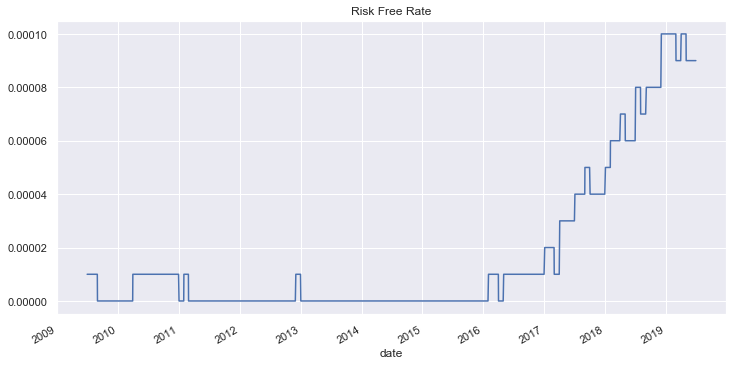

<Figure size 864x432 with 0 Axes>

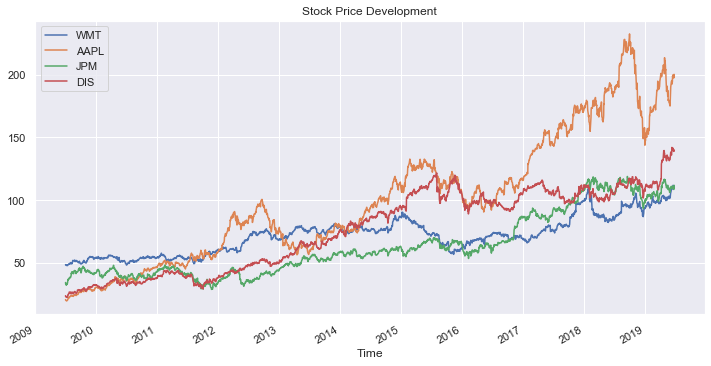

<Figure size 864x432 with 0 Axes>

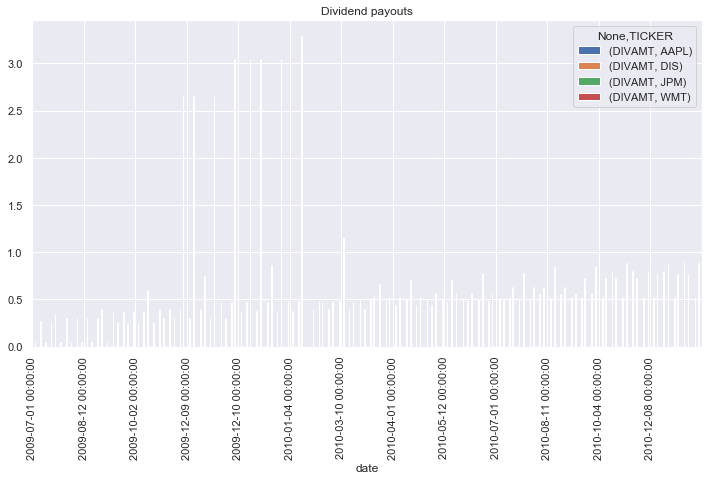

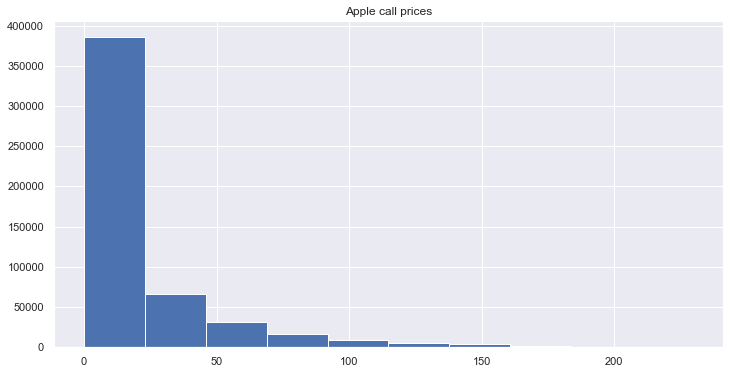

        date      exdate cp_flag  strike_price  best_bid  best_offer  \
0 2016-01-04  2016-01-08       C        100000      5.35        5.45   
1 2016-01-04  2016-01-08       C        101000      4.40        4.50   
2 2016-01-04  2016-01-08       C        102000      3.55        3.65   
3 2016-01-04  2016-01-08       C        103000      2.76        2.79   
4 2016-01-04  2016-01-08       C        104000      2.03        2.06   

   impl_volatility  forward_price ticker exercise_style   rf  T       Time  \
0         0.280558     105.354536   AAPL              A  0.0  4 2016-01-04   
1         0.276171     105.354536   AAPL              A  0.0  4 2016-01-04   
2         0.295935     105.354536   AAPL              A  0.0  4 2016-01-04   
3         0.290561     105.354536   AAPL              A  0.0  4 2016-01-04   
4         0.286634     105.354536   AAPL              A  0.0  4 2016-01-04   

      Price  midpoint  year  DIVAMT         q  
0  104.0871     5.400  2016    7.56  0.070115  
1 

In [134]:
options, stocks = load_data()

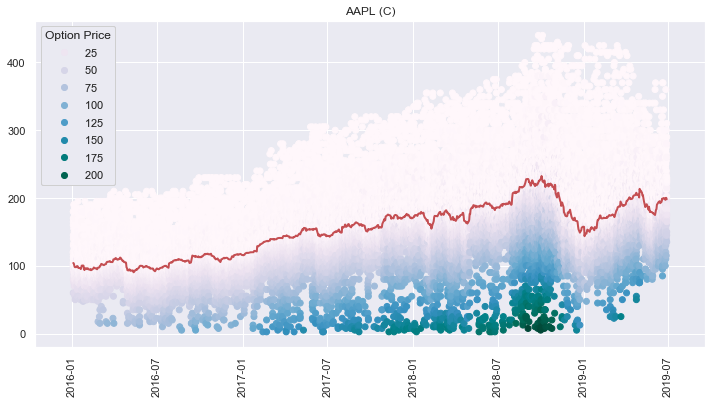

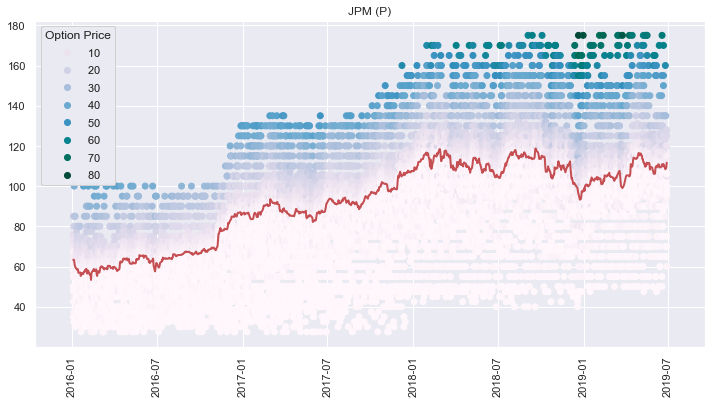

In [135]:
#for t in ["AAPL","DIS","JPM","WMT"]:
#    for f in ["C","P"]:
for (t,f) in [("AAPL","C"),("JPM","P")]:
        plot_strike_price(options, t, f)

Let's not consider options that are too far out of the money. Make it a function of the number of days that are still left

Reduce options from 3056897 observations to just 940392


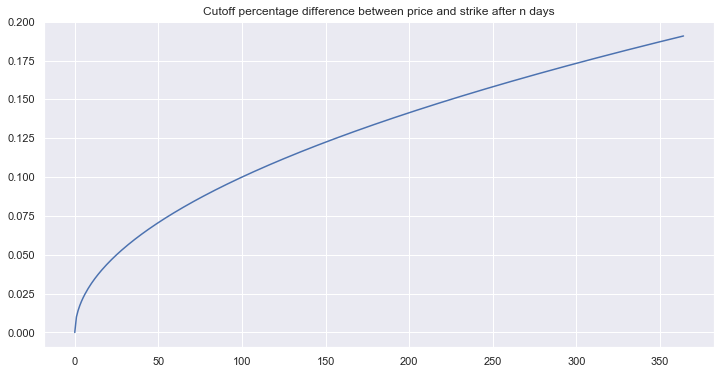

In [136]:
time_cutoff = lambda x: np.sqrt(x)/100
plt.plot(range(365), time_cutoff(range(365)))
plt.title('Cutoff percentage difference between price and strike after n days')
rowsbefore = len(options)
options = options[(np.abs(options.strike_price-options.Price*1000)/options.strike_price)<(np.sqrt(options['T'])/100)]
print("Reduce options from {before} observations to just {after}".format(before = rowsbefore, after = len(options)))

### American option pricing advanced monte carlo simulations

Based on https://github.com/shashank-khanna/Option-Pricing.
It is quite slow so we will take a random sample of n options from our option data to get an idea of the performance.

The model has a very rudimentary volatility approximation function for the monte carlo simulation input. Therefore, we also show what happens when we set the volatility to the implied volatility in the data.

We observe that although the model definitely comes close to the actual price but is still quite off on a regular basis. This is because the model is too simplified, with a simplified dividend rate and not accounting for the larger complexities of the market.

In [141]:
from shashank import price_american_options
from visualizations import plot_prediction_error, plot_error_dist, write_errors

if True:
    ss_df = pd.read_pickle("./shashank_results.pkl")
else:
    random.seed(1)
    n = 5000
    test_idx = random.sample(range(1, len(options)), n)
    ss_calc , iv_calc = price_american_options(options.iloc[test_idx,:].iterrows(), stocks, verbose = False)

    # Save results in a pickle
    ss_df = options.iloc[test_idx,:].copy()
    ss_df['Prediction_hist_vol'] = ss_calc
    ss_df['Prediction_impl_vol'] = iv_calc
    ss_df['Actual'] = ss_df['midpoint']
    ss_df['hist_vol_error'] =  ss_df['Prediction_hist_vol'] - ss_df['Actual']
    ss_df['impl_vol_error'] =  ss_df['Prediction_impl_vol'] - ss_df['Actual']
    ss_df['hist_vol_error_pct'] = ss_df['hist_vol_error'] / ss_df['Actual']
    ss_df['impl_vol_error_pct'] = ss_df['impl_vol_error'] / ss_df['Actual']
    ss_df.to_pickle("./shashank_results.pkl")

write_errors("With historical volatility",ss_df['hist_vol_error_pct'],ss_df['Actual'])
write_errors("With implied volatility",ss_df['impl_vol_error_pct'],ss_df['Actual'])


----------------------------------
With historical volatility
----------------------------------
Mean Squared Error:       0.17957322684545887
Root Mean Squared Error:  0.42376081324900594
Mean Absolute Error:      0.27158656672333464
Mean Percent Error:       0.06374873833356477

----------------------------------
With implied volatility
----------------------------------
Mean Squared Error:       0.040651535425968444
Root Mean Squared Error:  0.2016222592522176
Mean Absolute Error:      0.15122060434276277
Mean Percent Error:       0.030331177979260524



In [ ]:
# See error of historical vol predictions
plot_prediction_error(ss_df, y_var = "Prediction_hist_vol")
plot_error_dist(ss_df['hist_vol_error_pct'],ss_df['Ticker'])

In [ ]:
plot_prediction_error(ss_df, y_var = "Prediction_impl_vol")
plot_error_dist(ss_df['impl_vol_error_pct'],ss_df['Ticker'])

In [ ]:
print(ss_df.loc[ss_df.cp_flag == "P",["hist_vol_error_pct","impl_vol_error_pct"]].describe())
print(ss_df.loc[ss_df.cp_flag == "C",["hist_vol_error_pct","impl_vol_error_pct"]].describe())

### Machine learning methods

Neural network pricing of options based on https://srdas.github.io/DLBook/DeepLearningWithPython.html.

We will first price the american options by training a sequential neural network with the inputs:
- Spot
- Time to maturity
- Dividend rate
- Volatility
- Risk free rate

The model will be trained on the first 80% of data and tested on the final 20%. 

First, we will pass the implied volatility to the neural network. This is cheating a bit, because the implied volatility is a function of the other inputs and the option price according to the underlying mechanics. 

Therefore, at the second attempt, we will create a basic GARCH model to forecast volatility and use the forecast in the neural network.

In [138]:
from nnpricing import split_data, create_neural_network,checkAccuracy, rolling_garch_volatility, custom_activation
from keras.models import load_model

# First, split data into train and test
X_train, y_train, X_test, y_test, train_attributes, test_attributes = \
                split_data(options.copy(),'impl_volatility','midpoint')

# Obtain Neural network
model = create_neural_network(X_train, save = False)

#### Neural network layers
![title](model_horizontal.png)

In [140]:
if preload:
    model = load_model('IV_Model.h5', custom_objects = {"custom_activation":custom_activation})
else:
    # fit the model
    model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.1, verbose=1)
    model.save('IV_Model.h5')

Train on 677081 samples, validate on 75232 samples
Epoch 1/10
677081/677081 [==============================] - 34s 51us/step - loss: 2.2885e-04 - val_loss: 4.8304e-05
Epoch 2/10
195200/677081 [=======>......................] - ETA: 23s - loss: 1.5419e-04

KeyboardInterrupt: 

In [ ]:
#in sample performance
y_train_hat = np.squeeze(model.predict(X_train))
_ = checkAccuracy(y_train, y_train_hat, train_attributes, plot = False, )

In [ ]:
#out of sample performance
y_test_hat = np.squeeze(model.predict(X_test))
_ = checkAccuracy(y_test, y_test_hat, test_attributes)

#### Volatility Modelling
Instead of using the implied volatility (usually this information would not be available in advance), let's compare to a scenario in which our model learns to price the data based on a modelled volatility. In this example, we will use a straightforward GARCH model that forecasts volatility one day ahead on a rolling basis.

First, let's look at an example by forecasting volatility one day ahead after the first 100 days of apple data

In [ ]:
from arch import arch_model
data = stocks['AAPL'][:100]
returns = data.pct_change().dropna()*100
# Forecast one ahead: 
am = arch_model(returns, vol='GARCH', power=2.0, p=1, o=1, q=1)
res = am.fit()
forecasts = res.forecast()
print("On day 101, volatility is forecasted to be " + str(round(forecasts.mean.iloc[-1][0],3)))

In [ ]:
options = rolling_garch_volatility(options, stocks)

#### Use calculated volatility

Now we use the neural network again, this time with the GARCH volatility. 

In [ ]:
from nnpricing import split_data, create_neural_network,checkAccuracy, rolling_garch_volatility, custom_activation
# First, split data into train and test
X_train, y_train, X_test, y_test, train_attributes, test_attributes = \
                split_data(options.copy(),'GARCH_F1','midpoint')

if preload:
    model = load_model('Garch_Model.h5', custom_objects = {"custom_activation":custom_activation})
else:
    # Obtain Neural network
    model = create_neural_network(X_train, save = False)

    # fit the model
    model.fit(X_train, y_train, batch_size=64, epochs=10, validation_split=0.1, verbose=1)
    model.save('Garch_Model.h5')
    #in sample performance
    y_train_hat = np.squeeze(model.predict(X_train))
    _ = checkAccuracy(y_train, y_train_hat, train_attributes, plot = False, )

In [ ]:
#out of sample performance
y_test_hat = np.squeeze(model.predict(X_test))
_ = checkAccuracy(y_test, y_test_hat, test_attributes)